# <center>CI9-STR-08: Structural Dynamics</center>

## <center>Fourier Transform</center>

<center>**Dr C Málaga-Chuquitaype ([email](mailto:c.malaga@imperial.ac.uk), [webpage](http://www.imperial.ac.uk/emerging-structural-technologies))**</center>

***

Let's consider a signal composed of three sine waves:

$f(t) = A_1 \sin(\omega_1t) + A_2 \sin(\omega_2 t) + A_3 \sin(\omega_3 t)$

We will now create an interactive notebook that will allow us to vary the amplitudes (A1,A2,A3
) and frequencies (ω1,ω2,ω3
)


<font color='red'> PLEASE NOTE  that the interactive portions of this notebook will run slowly or may not run in the online notebook viewer. You may need to run it locally. If you wish to install notebook in your own computer you can find detailed instructions here: http://jupyter.org/install</font>

In [1]:
# Import the NumPy functions with namespace (nickname) np
import numpy as np

In [2]:
# Se-up to display plots inline
%matplotlib inline

In [3]:
# Import the plotting functions
import matplotlib.pyplot as plt

In [4]:
# Import the IPython widgets
from ipywidgets.widgets import interact
from ipywidgets import widgets
from IPython.display import display

In [5]:
# Create a time array/vector of 0-25s with 5001 samples
t = np.linspace(0,25, 5001)

In [6]:
def plot_FFT(A1=1.0, f1=1.0, A2=0.5, f2=2.75, A3=1.5, f3=7.5):
#from frequencies to circular frequencies
    w1=f1*(2*np.pi)
    w2=f2*(2*np.pi)
    w3=f3*(2*np.pi)

    orig_signal = A1*np.sin(w1*t) + A2*np.sin(w2*t) + A3*np.sin(w3*t) 

#we use the FFT algorithm

    freq,amp = mod_FFT(orig_signal,t,False)

# Set figure parameters
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,4))

    plt.subplots_adjust(bottom=0.12,left=0.17,top=0.96,right=0.96)
    plt.setp(ax1.get_ymajorticklabels(),family='arial',fontsize=14)
    plt.setp(ax1.get_xmajorticklabels(),family='arial',fontsize=14)
    
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')
    ax1.grid(True,linestyle=':',color='0.75')
    ax1.set_axisbelow(True)
    
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.xaxis.set_ticks_position('bottom')
    ax2.yaxis.set_ticks_position('left')
    ax2.grid(True,linestyle=':',color='0.75')
    ax2.set_axisbelow(True)

    #Original signal
    ax1.set_xlabel('Time [s]', family='arial', fontsize=14,weight='bold',labelpad=5)
    ax1.set_ylabel('Signal Amplitude', family='arial', fontsize=14,weight='bold',labelpad=10)
    
    ax1.plot(t, orig_signal, linewidth=2,linestyle='-',label='Original Signal')
    ax1.set_xlim(0,5)
    
    #FFT
    ax2.set_xlabel('Frequency [Hz]', fontsize=14,weight='bold',labelpad=5)
    ax2.set_ylabel('Fourier Amplitude', fontsize=14,weight='bold',labelpad=5)
    
    ax2.plot(freq, amp, linewidth=2, linestyle='-', label = 'FFT')
    
    #Adjustments
    plt.tight_layout(pad=0.5, w_pad=5.0)    

The function below implements the FFT algorithm. Although not strictly necesary, it also implements additional steps such as zero-centering, selecting the Real part, etc

In [7]:
def mod_FFT(data,time,plotflag):
    #Inputs:
    #time = time array corresponding to the data
    #data = the response data arrray
    #pltoflag = plots if nonzero
    #Outputs:
    #fft_freq = array of the frequencies used in the FFT
    #fft_amp = array of the amplitude of the FFT at each frequency
    
    from scipy.fftpack import fft
    
    #any DC offset
    offset = np.mean(data)
    
    #get sampling time
    sample_time = time[1]-time[0]
    
    #get length
    n = len(data)
    
    #calculate the FFT removing the offset and using a Hanning Window
    fft_amp = fft((data-offset)*np.hanning(len(data)))
    
    #define the frequency range of the output
    fft_freq = np.linspace(0.0, 1.0 / (2.0*sample_time), int(np.ceil(n/2)))
    
    #get the fft part of interest
    fft_amp = 2.0/n*np.abs(fft_amp[0:int(np.ceil(n/2))])
    
    #if plotflag is nonzero (True), plot the FFT before returning the mad and phase
    if plotflag:
        fig=plt.figure(figsize=(6,4))
        ax=plt.gca()
        plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
        plt.setp(ax.get_ymajorticklabels(), fontsize=14)
        plt.setp(ax.get_xmajorticklabels(), fontsize=14)
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.grid(True, linestyle=':', color='0.75')
        ax.set_axisbelow(True)
        
        plt.xlabel('Frequency [Hz]', fontsize=14,labelpad=8)
        plt.ylabel('Fourier Amplitude', fontsize=14,labelpad=10)
        
        plt.plot(fft_freq,fft_amp,linewidth=2,linestyle='-')
        
        #Adjustements
        plt.tight_layout(pad=0.5)
        plt.show()
        
    return fft_freq, fft_amp  

Now, let's call the interact function, set-up the ranges for each parameter and define the sliders.

<function __main__.plot_FFT>

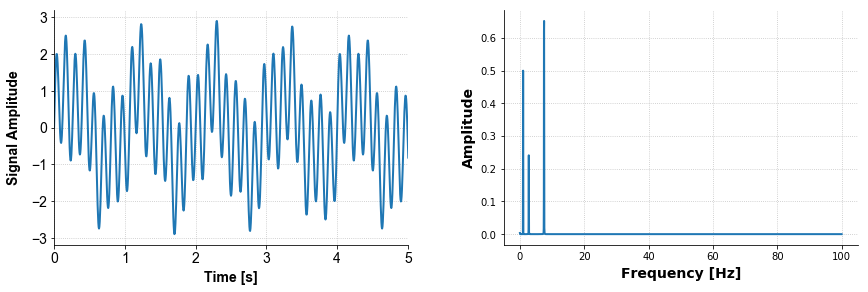

In [8]:
#Call the slider interaction
interact(plot_FFT, A1 = (0,1.5,0.1),
         f1 = (0,100,2.5),
         A2 = (0,1.5,0.1),
         f2 = (0,100,2.5),
         A3 = (0,1.5,0.1),
         f3 = (0,100,2.5))